# Code for Figure 5 part (a) and associated statistics reported in the text

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [4]:
extra_save_str='' #'_afterstorage'
penlevel = 0.5

scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol','_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals1 = np.zeros((7, 5)) # overgeneration
tables_dfs1 = pd.DataFrame(np.zeros((7, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

vals2 = np.zeros((7, 5)) # ramping
tables_dfs2 = pd.DataFrame(np.zeros((7, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol','_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])
numdays = []
for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        overgen = None
        dpdf = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20220408.csv')
        try:
            overgen = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_overgeneration'+extra_save_str+'.csv')
        except:
            print('No overgen')
        if overgen is not None:
            vals1[i, j] = np.abs(overgen.demand.sum())
            tables_dfs1.loc[scen1, scen2] = np.abs(overgen.demand.sum())
            numdays.append(len(pd.to_datetime(overgen['datetime']).dt.date.unique()))
        
        prof1 = np.zeros((25, ))
        prof1[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0) # in original 
        prof1[24] = prof1[0]
        vals2[i, j] = np.max(prof1[1:] - prof1[:-1])
        tables_dfs2.loc[scen1, scen2] = np.max(prof1[1:] - prof1[:-1])
        
        
scen2 = 'BusinessAsUsual'
scen1 =  '_TimersMixed_WPcontrol_minpeak'
i = i+1
j = j+1
overgen = None
dpdf = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20220408.csv')
try: 
    overgen = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_overgeneration'+extra_save_str+'.csv')
except:
    print('No overgeneration for ', scen1, scen2)        
        
if overgen is not None:
    vals1[i, j] = np.abs(overgen.demand.sum())
    tables_dfs1.loc[scen1, scen2] = np.abs(overgen.demand.sum())
    numdays.append(len(pd.to_datetime(overgen['datetime']).dt.date.unique()))

prof = np.zeros((25, ))
prof[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0)
prof[24] = prof[0]
vals2[i, j] = np.max(prof[1:] - prof[:-1])
tables_dfs2.loc[scen1, scen2] = np.max(prof[1:] - prof[:-1])        




In [11]:
tmp = pd.read_csv('Results/NoEVs_year2035_solar3.5x_wind3x_overgeneration.csv')
len(pd.to_datetime(tmp['datetime']).dt.date.unique())

100

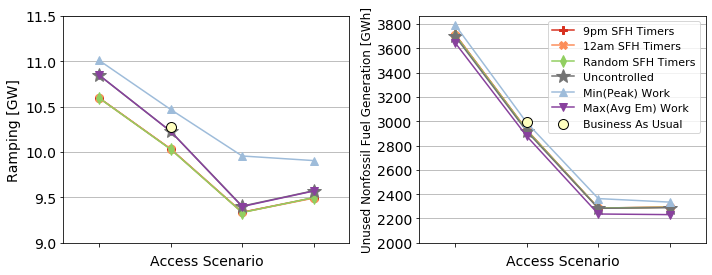

In [4]:
plt.figure(figsize=(10, 4))
titles = ['1', '2', '3', '4']

colors = ['#d7301f', '#fc8d59',  '#91cf60', '#737373', '#9ebcda', '#88419d']
control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Random SFH Timers', 'Uncontrolled', 'Min(Peak) Work', 'Max(Avg Em) Work']

plt.subplot(121)
plt.xlabel('Access Scenario', fontsize=14)
plt.ylabel('Ramping [GW]', fontsize=14)
plt.xticks(np.arange(0, 4), labels=[], fontsize=12)

ms = [8, 8, 8, 14, 8, 8]
lines = ['-P', '-X', '-d', '-*', '-^','-v']
for control_idx in range(6):
    plt.plot(np.arange(0, 4), (1/1000)*vals2[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], label=control_labels[control_idx], zorder=1, markersize=ms[control_idx])
plt.scatter(np.array([1]), np.array((1/1000)*tables_dfs2.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, label='Business As Usual')
plt.xlim([-0.5, 3.5])
# plt.yticks(np.arange(2, 7), fontsize=14)
plt.yticks(np.arange(9, 12, 0.5), fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid(axis='y')


plt.subplot(122)


plt.xticks(np.arange(0, 4), labels=[], fontsize=12)
plt.xlabel('Access Scenario', fontsize=14)
plt.yticks([20, 40, 60, 80, 100], fontsize=12)
plt.xlim([-0.5, 3.5])


lines = ['-P', '-X', '-d', '-*', '-^','-v']
ms = [8, 8, 8, 14, 8, 8]
edgecolors=[colors[0], colors[1],'k', colors[2], colors[3]]
for control_idx in range(6):
    plt.plot(np.arange(0, 4), (1/1000)*vals1[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], label=control_labels[control_idx], zorder=1, markersize=ms[control_idx])
plt.ylabel('Unused Nonfossil Fuel Generation [GWh]', fontsize=12)
plt.scatter(np.array([1]), np.array((1/1000)*tables_dfs1.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, label='Business As Usual')
            
plt.legend(fontsize=11)
plt.yticks(np.arange(2000, 4000, 200), fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid(axis='y')

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig5a_option1_v2_2035_withoutstoragebefore.pdf', bbox_inches='tight')
plt.show()

In [6]:
extra_save_str='_afterstorage'
penlevel = 0.5

scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol','_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals1 = np.zeros((7, 5)) # overgeneration
tables_dfs1 = pd.DataFrame(np.zeros((7, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

vals2 = np.zeros((7, 5)) # ramping
tables_dfs2 = pd.DataFrame(np.zeros((7, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol','_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        overgen = None
        dpdf = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20220408.csv')
        try:
            overgen = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_overgeneration'+extra_save_str+'.csv')
        except:
            print('No overgen')
        if overgen is not None:
            vals1[i, j] = np.abs(overgen.demand.sum())
            tables_dfs1.loc[scen1, scen2] = np.abs(overgen.demand.sum())
        
        prof1 = np.zeros((25, ))
        prof1[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0) # in original 
        prof1[24] = prof1[0]
        vals2[i, j] = np.max(prof1[1:] - prof1[:-1])
        tables_dfs2.loc[scen1, scen2] = np.max(prof1[1:] - prof1[:-1])
        
        
scen2 = 'BusinessAsUsual'
scen1 =  '_TimersMixed_WPcontrol_minpeak'
i = i+1
j = j+1
overgen = None
dpdf = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20220408.csv')
try: 
    overgen = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_overgeneration'+extra_save_str+'.csv')
except:
    print('No overgeneration for ', scen1, scen2)        
        
if overgen is not None:
    vals1[i, j] = np.abs(overgen.demand.sum())
    tables_dfs1.loc[scen1, scen2] = np.abs(overgen.demand.sum())

prof = np.zeros((25, ))
prof[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0)
prof[24] = prof[0]
vals2[i, j] = np.max(prof[1:] - prof[:-1])
tables_dfs2.loc[scen1, scen2] = np.max(prof[1:] - prof[:-1])        




In [5]:
extra_save_str='_afterstorage'
penlevel = 1.0

scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol','_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals1_100p = np.zeros((7, 5)) # overgeneration
tables_dfs1_100p = pd.DataFrame(np.zeros((7, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

vals2_100p = np.zeros((7, 5)) # ramping
tables_dfs2_100p = pd.DataFrame(np.zeros((7, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol','_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        overgen = None
        dpdf = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20220408.csv')
        try:
            overgen = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_overgeneration'+extra_save_str+'.csv')
        except:
            print('No overgen')
        if overgen is not None:
            vals1_100p[i, j] = np.abs(overgen.demand.sum())
            tables_dfs1_100p.loc[scen1, scen2] = np.abs(overgen.demand.sum())
        
        prof1 = np.zeros((25, ))
        prof1[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0) # in original 
        prof1[24] = prof1[0]
        vals2_100p[i, j] = np.max(prof1[1:] - prof1[:-1])
        tables_dfs2_100p.loc[scen1, scen2] = np.max(prof1[1:] - prof1[:-1])
        
        
scen2 = 'BusinessAsUsual'
scen1 =  '_TimersMixed_WPcontrol_minpeak'
i = i+1
j = j+1
overgen = None
dpdf = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20220408.csv')
try: 
    overgen = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_overgeneration'+extra_save_str+'.csv')
except:
    print('No overgeneration for ', scen1, scen2)        
        
if overgen is not None:
    vals1_100p[i, j] = np.abs(overgen.demand.sum())
    tables_dfs1_100p.loc[scen1, scen2] = np.abs(overgen.demand.sum())

prof = np.zeros((25, ))
prof[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0)
prof[24] = prof[0]
vals2_100p[i, j] = np.max(prof[1:] - prof[:-1])
tables_dfs2_100p.loc[scen1, scen2] = np.max(prof[1:] - prof[:-1])        




In [11]:
((1/1000)*tables_dfs1[tables_dfs1>0]).min(axis=0)

UniversalHome       1670.201925
HighHome            1221.798586
LowHome_HighWork     942.706939
LowHome_LowWork      937.511497
BusinessAsUsual     1265.826495
dtype: float64

In [13]:
((1/1000)*tables_dfs1[tables_dfs1>0]).max(axis=0)

UniversalHome       1726.940392
HighHome            1259.773601
LowHome_HighWork    1002.009474
LowHome_LowWork      973.555788
BusinessAsUsual     1265.826495
dtype: float64

In [17]:
print(1 - (tables_dfs1.loc['_TimersNone_noWPcontrol', 'LowHome_LowWork']/tables_dfs1.loc['_Timers9pm_noWPcontrol', 'UniversalHome']))
print(1 - (tables_dfs1.loc['_TimersNone_noWPcontrol', 'LowHome_LowWork']/tables_dfs1.loc['_TimersNone_WPcontrol_minpeak', 'UniversalHome']))



0.43906539800923794
0.4489434525537279


In [14]:
tables_dfs2.loc[:, ['LowHome_HighWork', 'LowHome_LowWork']].max().max() / tables_dfs2.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']



0.8208069348146962

In [12]:
(1/1000)*tables_dfs1

,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_Timers9pm_noWPcontrol,1696.528984,1236.773599,966.897733,954.008795,0.000000
_Timers12am_noWPcontrol,1695.060224,1235.662199,966.705021,953.415368,0.000000
_TimersRandom_noWPcontrol,1692.679055,1234.835824,966.812768,953.328886,0.000000
_TimersNone_noWPcontrol,1685.106713,1230.385471,965.298586,951.641810,0.000000
_TimersNone_WPcontrol_minpeak,1726.940392,1259.773601,1002.009474,973.555788,0.000000
_TimersNone_WPcontrol_avgem,1670.201925,1221.798586,942.706939,937.511497,0.000000
_TimersMixed_WPcontrol_minpeak,0.000000,0.000000,0.000000,0.000000,1265.826495


In [5]:
tables_dfs2

,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_Timers9pm_noWPcontrol,9709.414400,8502.298744,6486.153327,6752.493713,0.000000
_Timers12am_noWPcontrol,9273.386012,8034.597998,6299.324316,6551.875494,0.000000
_TimersRandom_noWPcontrol,9375.787590,8141.987355,6346.975605,6606.954570,0.000000
_TimersNone_noWPcontrol,9690.595279,8391.492005,6418.507422,6685.212844,0.000000
_TimersNone_WPcontrol_minpeak,9721.756673,8485.393561,6711.364556,6880.127789,0.000000
_TimersNone_WPcontrol_avgem,9674.807411,8335.532299,6180.295906,6537.541553,0.000000
_TimersMixed_WPcontrol_minpeak,0.000000,0.000000,0.000000,0.000000,8382.151146


In [18]:
print(1 - (tables_dfs2.loc['_TimersNone_noWPcontrol', 'LowHome_LowWork']/tables_dfs2.loc['_Timers9pm_noWPcontrol', 'UniversalHome']))
print(1 - (tables_dfs2.loc['_TimersNone_noWPcontrol', 'LowHome_LowWork']/tables_dfs2.loc['_TimersNone_WPcontrol_minpeak', 'UniversalHome']))



0.3114710559426729
0.31234517910865467


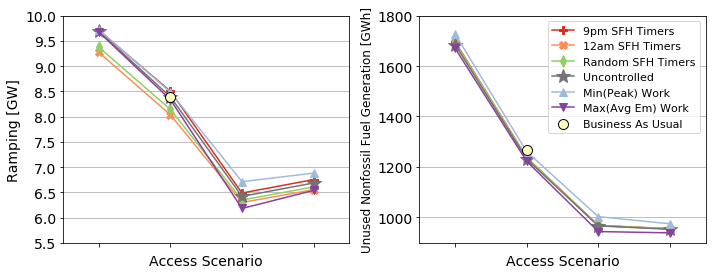

In [6]:
plt.figure(figsize=(10, 4))
titles = ['1', '2', '3', '4']

colors = ['#d7301f', '#fc8d59',  '#91cf60', '#737373', '#9ebcda', '#88419d']
control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Random SFH Timers', 'Uncontrolled', 'Min(Peak) Work', 'Max(Avg Em) Work']

plt.subplot(121)
plt.xlabel('Access Scenario', fontsize=14)
plt.ylabel('Ramping [GW]', fontsize=14)
plt.xticks(np.arange(0, 4), labels=[], fontsize=12)

ms = [8, 8, 8, 14, 8, 8]
lines = ['-P', '-X', '-d', '-*', '-^','-v']
for control_idx in range(6):
    plt.plot(np.arange(0, 4), (1/1000)*vals2[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], label=control_labels[control_idx], zorder=1, markersize=ms[control_idx])
plt.scatter(np.array([1]), np.array((1/1000)*tables_dfs2.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, label='Business As Usual')
plt.xlim([-0.5, 3.5])
# plt.yticks(np.arange(2, 7), fontsize=14)
plt.yticks(np.arange(5.5, 10.5, 0.5), fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid(axis='y')


plt.subplot(122)


plt.xticks(np.arange(0, 4), labels=[], fontsize=12)
plt.xlabel('Access Scenario', fontsize=14)
plt.yticks([20, 40, 60, 80, 100], fontsize=12)
plt.xlim([-0.5, 3.5])


lines = ['-P', '-X', '-d', '-*', '-^','-v']
ms = [8, 8, 8, 14, 8, 8]
edgecolors=[colors[0], colors[1],'k', colors[2], colors[3]]
for control_idx in range(6):
    plt.plot(np.arange(0, 4), (1/1000)*vals1[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], label=control_labels[control_idx], zorder=1, markersize=ms[control_idx])
plt.ylabel('Unused Nonfossil Fuel Generation [GWh]', fontsize=12)
plt.scatter(np.array([1]), np.array((1/1000)*tables_dfs1.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, label='Business As Usual')
            
plt.legend(fontsize=11)
plt.yticks(np.arange(1000, 2000, 200), fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid(axis='y')

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig5a_option1_v2_2035_withstorage.pdf', bbox_inches='tight')
plt.show()

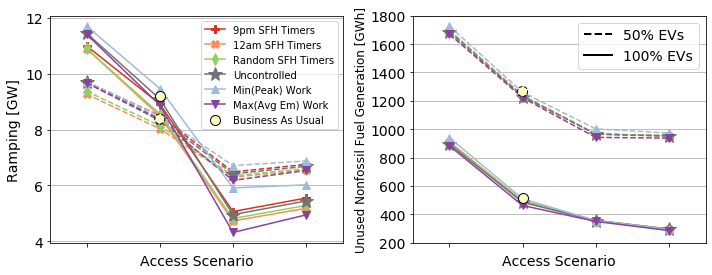

In [19]:
plt.figure(figsize=(10, 4))
titles = ['1', '2', '3', '4']

colors = ['#d7301f', '#fc8d59',  '#91cf60', '#737373', '#9ebcda', '#88419d']
control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Random SFH Timers', 'Uncontrolled', 'Min(Peak) Work', 'Max(Avg Em) Work']

plt.subplot(121)
plt.xlabel('Access Scenario', fontsize=14)
plt.ylabel('Ramping [GW]', fontsize=14)
plt.xticks(np.arange(0, 4), labels=[], fontsize=12)

ms = [8, 8, 8, 14, 8, 8]
lines = ['-P', '-X', '-d', '-*', '-^','-v']
for control_idx in range(6):
    plt.plot(np.arange(0, 4), (1/1000)*vals2[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], zorder=1, markersize=ms[control_idx], linestyle='--')
plt.scatter(np.array([1]), np.array((1/1000)*tables_dfs2.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, linestyle='--')
for control_idx in range(6):
    plt.plot(np.arange(0, 4), (1/1000)*vals2_100p[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], label=control_labels[control_idx], zorder=1, markersize=ms[control_idx], linestyle='-')
plt.scatter(np.array([1]), np.array((1/1000)*tables_dfs2_100p.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, label='Business As Usual', linestyle='-')
plt.xlim([-0.5, 3.5])
# plt.yticks(np.arange(2, 7), fontsize=14)
plt.yticks(np.arange(4, 13, 2), fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid(axis='y')
plt.legend(fontsize=10)



plt.subplot(122)


plt.xticks(np.arange(0, 4), labels=[], fontsize=12)
plt.xlabel('Access Scenario', fontsize=14)
plt.xlim([-0.5, 3.5])


lines = ['-P', '-X', '-d', '-*', '-^','-v']
ms = [8, 8, 8, 14, 8, 8]
edgecolors=[colors[0], colors[1],'k', colors[2], colors[3]]
for control_idx in range(6):
    plt.plot(np.arange(0, 4), (1/1000)*vals1[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], zorder=1, label='', markersize=ms[control_idx], linestyle='--')
plt.ylabel('Unused Nonfossil Fuel Generation [GWh]', fontsize=12)
plt.scatter(np.array([1]), np.array((1/1000)*tables_dfs1.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, linestyle='--')
for control_idx in range(6):
    plt.plot(np.arange(0, 4), (1/1000)*vals1_100p[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], label='', zorder=1, markersize=ms[control_idx])
plt.scatter(np.array([1]), np.array((1/1000)*tables_dfs1_100p.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, label='')
            
    
    
plt.yticks(np.arange(200, 2000, 200), fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid(axis='y')

legend_elements = [Line2D([0], [0], color='k', lw=2, linestyle='--', label='50% EVs'),
                   Line2D([0], [0], color='k', lw=2, linestyle='-',label='100% EVs')]
plt.gca().legend(handles=legend_elements, loc='upper right', fontsize=14)

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig5a_v3_2035_withstorage_50and100p.pdf', bbox_inches='tight')
plt.show()

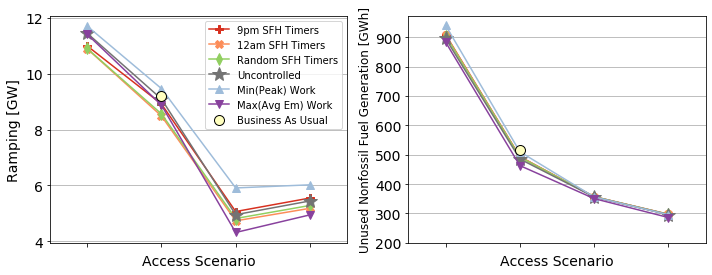

In [21]:
plt.figure(figsize=(10, 4))
titles = ['1', '2', '3', '4']

colors = ['#d7301f', '#fc8d59',  '#91cf60', '#737373', '#9ebcda', '#88419d']
control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Random SFH Timers', 'Uncontrolled', 'Min(Peak) Work', 'Max(Avg Em) Work']

plt.subplot(121)
plt.xlabel('Access Scenario', fontsize=14)
plt.ylabel('Ramping [GW]', fontsize=14)
plt.xticks(np.arange(0, 4), labels=[], fontsize=12)

ms = [8, 8, 8, 14, 8, 8]
lines = ['-P', '-X', '-d', '-*', '-^','-v']
# for control_idx in range(6):
#     plt.plot(np.arange(0, 4), (1/1000)*vals2[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], zorder=1, markersize=ms[control_idx], linestyle='--')
# plt.scatter(np.array([1]), np.array((1/1000)*tables_dfs2.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, linestyle='--')
for control_idx in range(6):
    plt.plot(np.arange(0, 4), (1/1000)*vals2_100p[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], label=control_labels[control_idx], zorder=1, markersize=ms[control_idx], linestyle='-')
plt.scatter(np.array([1]), np.array((1/1000)*tables_dfs2_100p.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, label='Business As Usual', linestyle='-')
plt.xlim([-0.5, 3.5])
# plt.yticks(np.arange(2, 7), fontsize=14)
plt.yticks(np.arange(4, 13, 2), fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid(axis='y')
plt.legend(fontsize=10)



plt.subplot(122)


plt.xticks(np.arange(0, 4), labels=[], fontsize=12)
plt.xlabel('Access Scenario', fontsize=14)
plt.xlim([-0.5, 3.5])


lines = ['-P', '-X', '-d', '-*', '-^','-v']
ms = [8, 8, 8, 14, 8, 8]
edgecolors=[colors[0], colors[1],'k', colors[2], colors[3]]
# for control_idx in range(6):
#     plt.plot(np.arange(0, 4), (1/1000)*vals1[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], zorder=1, label='', markersize=ms[control_idx], linestyle='--')
plt.ylabel('Unused Nonfossil Fuel Generation [GWh]', fontsize=12)
# plt.scatter(np.array([1]), np.array((1/1000)*tables_dfs1.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, linestyle='--')
for control_idx in range(6):
    plt.plot(np.arange(0, 4), (1/1000)*vals1_100p[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], label='', zorder=1, markersize=ms[control_idx])
plt.scatter(np.array([1]), np.array((1/1000)*tables_dfs1_100p.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, label='')
            
    
    
plt.yticks(np.arange(200, 1000, 100), fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid(axis='y')

# legend_elements = [Line2D([0], [0], color='k', lw=2, linestyle='--', label='50% EVs'),
#                    Line2D([0], [0], color='k', lw=2, linestyle='-',label='100% EVs')]
# plt.gca().legend(handles=legend_elements, loc='upper right', fontsize=14)

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig5a_v3_2035_withstorage_100ponly.pdf', bbox_inches='tight')
plt.show()